## Compare and summarize sample clusters
### Input: sample clusters of tcga, mondor, merged
### Output: comparative summary and confusion matrix

In [2]:
import os
import pandas as pd
import numpy as np
import seaborn
import matplotlib.pyplot as plt

In [3]:
path = "/media/visiopharm5/WDGold/deeplearning/Hepatocarcinomes/TCGA/merge_series"
path_tcga = "/media/visiopharm5/WDGold/deeplearning/Hepatocarcinomes/TCGA/validation"
path_mondor = "/media/visiopharm5/WDGold/deeplearning/Hepatocarcinomes/TCGA/heatmap_nanostring_155"

In [78]:
gene_sign = "T-cell_Exhaustion" # to input
file = "sample_clusters_" + gene_sign + "_zscore_hc_ward.D2_euclidean_3_reorder.csv"

### Load sample clusters of merged, tcga and mondor

In [79]:
df_merged = pd.read_csv(os.path.join(path, file))
print(df_merged.shape)
display(df_merged.head(5))

(495, 2)


,Sample,Cluster
0,A6M3.01A,Cluster High
1,A7IJ.01A,Cluster High
2,AAVP.01A,Cluster High
3,A110.01A,Cluster High
4,AAE2.01A,Cluster High


In [80]:
df_tcga = pd.read_csv(os.path.join(path_tcga, file))
print(df_tcga.shape)
display(df_tcga.head(5))

(340, 2)


,Sample,Cluster
0,A6M3.01A,Cluster High
1,A7IJ.01A,Cluster High
2,AAVP.01A,Cluster High
3,A110.01A,Cluster High
4,AAE2.01A,Cluster High


In [81]:
df_mondor = pd.read_csv(os.path.join(path_mondor, file))
print(df_mondor.shape)
display(df_mondor.head(5))

(155, 2)


,Sample,Cluster
0,EX128.ARN273,Cluster High
1,EX128.ARN293,Cluster High
2,EX128.ARN275,Cluster High
3,EX128.ARN280,Cluster High
4,EX128.ARN202,Cluster High


### Merge sample clusters of tcga and mondor (separate, individual)

In [82]:
df_sep = pd.concat([df_tcga, df_mondor], ignore_index=True)
print(df_sep.shape)
display(df_sep.head(5))

(495, 2)


,Sample,Cluster
0,A6M3.01A,Cluster High
1,A7IJ.01A,Cluster High
2,AAVP.01A,Cluster High
3,A110.01A,Cluster High
4,AAE2.01A,Cluster High


### Extract sample IDs of "Cluster High" and "Cluster Median + Low" as list

In [83]:
# individual
ind_h = set(df_sep[df_sep['Cluster']=='Cluster High']['Sample'].to_list())
print("Individually clustering: " + str(len(ind_h)) + " Cluster High")

ind_ml = df_sep[df_sep['Cluster']=='Cluster Median']['Sample'].to_list()
ind_ml.extend(df_sep[df_sep['Cluster']=='Cluster Low']['Sample'].to_list())
ind_ml = set(ind_ml)
print("Individually clustering: " + str(len(ind_ml)) + " Cluster Median + Low")

Individually clustering: 91 Cluster High
Individually clustering: 404 Cluster Median + Low


In [84]:
mer_h = set(df_merged[df_merged['Cluster']=='Cluster High']['Sample'].to_list())
print("Merged then clustering: " + str(len(mer_h)) + " Cluster High")

mer_ml = df_merged[df_merged['Cluster']=='Cluster Median']['Sample'].to_list()
mer_ml.extend(df_merged[df_merged['Cluster']=='Cluster Low']['Sample'].to_list())
mer_ml = set(mer_ml)
print("Merged then clustering: " + str(len(mer_ml)) + " Cluster Median + Low")

Merged then clustering: 70 Cluster High
Merged then clustering: 425 Cluster Median + Low


### Count tp, fp, tn and fn

In [85]:
tp = list(ind_h.intersection(mer_h))
print("tp: " + str(len(tp)))
fp = list(ind_h.intersection(mer_ml))
print("fp: " + str(len(fp)))
tn = list(ind_ml.intersection(mer_ml))
print("tn: " + str(len(tn)))
fn = list(ind_ml.intersection(mer_h))
print("fn: " + str(len(fn)))

tp: 60
fp: 31
tn: 394
fn: 10


### Summarize comparative results and export

In [86]:
df_res = pd.DataFrame({'Sample': tp + fp + tn + fn, 
                       'Label': ['tp']*len(tp) + ['fp']*len(fp) + ['tn']*len(tn) + ['fn']*len(fn), 
                       'Individually clustering': ['Cluster High']*len(tp) + ['Cluster High']*len(fp) + ['Cluster Median + Low']*len(tn) + (['Cluster Median + Low']*len(fn)), 
                       'Merged then clustering':['Cluster High']*len(tp) + ['Cluster Median + Low']*len(fp) + ['Cluster Median + Low']*len(tn) + ['Cluster High']*len(fn)})
print(df_res.shape)
display(df_res.head(5))

(495, 4)


,Sample,Label,Individually clustering,Merged then clustering
0,A4NR.01A,tp,Cluster High,Cluster High
1,EX128.ARN200,tp,Cluster High,Cluster High
2,AAE2.01A,tp,Cluster High,Cluster High
3,EX128.ARN220,tp,Cluster High,Cluster High
4,A95S.01A,tp,Cluster High,Cluster High


In [87]:
df_res.to_csv(os.path.join(path, "merged_compare_sample_cluster_"+gene_sign+".csv"), index=False)

### Confusion matrix

In [88]:
data = [len(tp), len(fn), len(fp), len(tn)]
data = np.reshape(data,(2,2))

labels = ["High", "Low + Median"]

In [89]:
data.sum()

495

[]

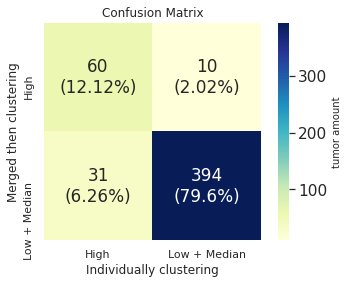

In [90]:
seaborn.set(color_codes=True)
#    plt.figure(1, figsize=(9, 6))

plt.title("Confusion Matrix")

seaborn.set(font_scale=1.4)

annot = [str(data.flatten()[i]) + "\n(" + str(np.round(data/data.sum()*100, 2).flatten()[i])+"%)" for i in range(4)]
# print(annotations)
annot = np.reshape(annot,(2,2))

# ax = seaborn.heatmap(data_mean, annot=True, cmap="YlGnBu", cbar_kws={'label': 'slide amount'}, fmt=".2f")
ax = seaborn.heatmap(data, annot=annot, cmap="YlGnBu", cbar_kws={'label': 'tumor amount'}, square=True,
                     fmt = '')

ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

ax.set(ylabel="Merged then clustering", 
       xlabel="Individually clustering")
ax.figure.axes[-1].yaxis.label.set_size(10)

plt.savefig(os.path.join(path, "merged_compare_sample_cluster_"+gene_sign+"_confusion_matrix.png"), bbox_inches='tight', dpi=300)
plt.plot()